In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
from tardis.simulation import Simulation
from tardis.io.config_reader import Configuration

[py.warnings         ][WARNING]  /home/vaibhav/Documents/tardis/tardis/tardis/io/decay.py:2: QAWarning: pyne.data is not yet QA compliant.
  from pyne import nucname, material
 (decay.py:2)
py.warnings - WARNING - /home/vaibhav/Documents/tardis/tardis/tardis/io/decay.py:2: QAWarning: pyne.data is not yet QA compliant.
  from pyne import nucname, material

[py.warnings         ][WARNING]  /home/vaibhav/Documents/tardis/tardis/tardis/io/decay.py:2: QAWarning: pyne.material is not yet QA compliant.
  from pyne import nucname, material
 (decay.py:2)
py.warnings - WARNING - /home/vaibhav/Documents/tardis/tardis/tardis/io/decay.py:2: QAWarning: pyne.material is not yet QA compliant.
  from pyne import nucname, material



In [4]:
config1 = Configuration.from_yaml('config_1.yml')
config1.model.abundances

{'Ar': 0.04,
 'Ca': 0.03,
 'Mg': 0.03,
 'Ni56': 0.1,
 'O': 0.19,
 'S': 0.19,
 'Si': 0.42,
 'type': 'uniform'}

In [5]:
sim1 = Simulation.from_config(config1)
sim1.run()

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:72)
tardis.plasma.standard_plasmas - INFO - Reading Atomic Data from kurucz_cd23_chianti_H_He.h5
tardis.atomic - INFO - Read Atom Data with UUID=5ca3035ca8b311e3bb684437e69d75d7 and MD5=21095dd25faa1683f4c90c911a00c3f8
[tardis.plasma.base  ][DEBUG  ]  Updating modules in the following order: (base.py:195)
tardis.plasma.base - DEBUG - Updating modules in the following order:
[tardis.montecarlo.base][DEBUG  ]  Electron scattering switched on (base.py:416)
tardis.montecarlo.base - DEBUG - Electron scattering switched on
[py.warnings         ][WARNING]  /home/vaibhav/anaconda2/lib/python2.7/site-packages/astropy/units/equivalencies.py:74: RuntimeWarning: divide by zero encountered in double_scalars
  (si.m, si.Hz, lambda x: _si.c.value / x),
 (equivalencies.py:74)
py.warnings - WARNING - /home/vaibhav/anaconda2/lib/python2.7/site-packages/astropy/units/equivalencies.py:74: R

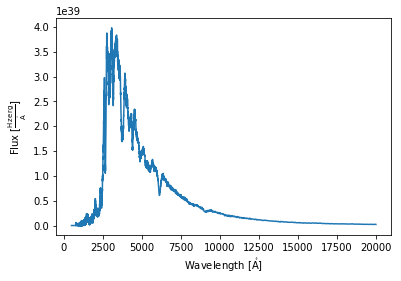

In [16]:
sim1.runner.spectrum_virtual.plot()

In [7]:
config2 = Configuration.from_yaml('config_2.yml')
config2.model.abundances

{'Ar': 0.04,
 'Ca': 0.03,
 'Co': 0.072,
 'Fe': 0.005,
 'Mg': 0.03,
 'Ni': 0.023,
 'O': 0.19,
 'S': 0.19,
 'Si': 0.42,
 'type': 'uniform'}

In [8]:
sim2 = Simulation.from_config(config2)
sim2.run()

[tardis.plasma.standard_plasmas][INFO   ]  Reading Atomic Data from kurucz_cd23_chianti_H_He.h5 (standard_plasmas.py:72)
tardis.plasma.standard_plasmas - INFO - Reading Atomic Data from kurucz_cd23_chianti_H_He.h5
tardis.atomic - INFO - Read Atom Data with UUID=5ca3035ca8b311e3bb684437e69d75d7 and MD5=21095dd25faa1683f4c90c911a00c3f8
[tardis.plasma.base  ][DEBUG  ]  Updating modules in the following order: (base.py:195)
tardis.plasma.base - DEBUG - Updating modules in the following order:
[tardis.montecarlo.base][DEBUG  ]  Electron scattering switched on (base.py:416)
tardis.montecarlo.base - DEBUG - Electron scattering switched on
[tardis.simulation.base][INFO   ]  Starting iteration 1/5 (base.py:194)
tardis.simulation.base - INFO - Starting iteration 1/5
[tardis.simulation.base][INFO   ]  Luminosity emitted = 6.28542e+42 erg / s Luminosity absorbed = 4.38772e+42 erg / s Luminosity requested = 1.07688e+43 erg / s (base.py:271)
tardis.simulation.base - INFO - Luminosity emitted = 6.285

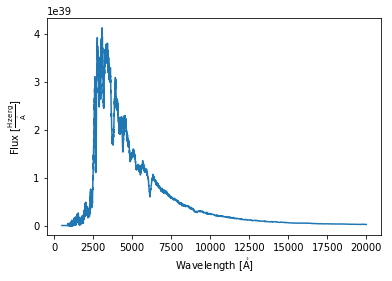

In [17]:
sim2.runner.spectrum_virtual.plot()

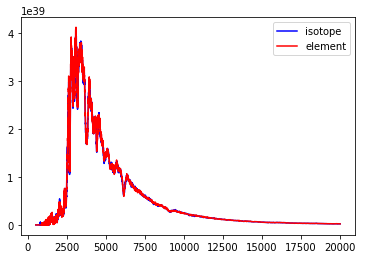

In [18]:
plt.plot(sim1.runner.spectrum_virtual.wavelength.value, sim1.runner.spectrum_virtual.luminosity_density_lambda.value, 'b', label='isotope')
plt.plot(sim2.runner.spectrum_virtual.wavelength.value, sim2.runner.spectrum_virtual.luminosity_density_lambda.value, 'r', label='element')
plt.legend()
plt.show()

In [11]:
### Ni56 Decay
from tardis.io.decay import IsotopeAbundances
import pandas as pd
def simple_abundance_model():
    index = pd.MultiIndex.from_tuples([(28, 56)],
                                      names=['atomic_number', 'mass_number'])
    return IsotopeAbundances([[0.1, 0.1]], index=index)
simple_abundance_model().decay(13) #model.time_explosion = 13 days

,,0,1
atomic_number,mass_number,,
26,56,0.00535125,0.00535125
27,56,0.0719558,0.0719558
28,56,0.0226893,0.0226893


In [12]:
config2.supernova.time_explosion

<Quantity 13.0 d>

In [13]:
config1.supernova.time_explosion

<Quantity 13.0 d>

In [14]:
0.00535125+0.0719558+0.0226893

0.09999635

In [15]:
0.005+0.072+0.023

0.1